In [8]:
# Dependencies
import numpy as np
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
consumer_key = "Z67A0R8jHz9rhRyiKMkBTWQaw"
consumer_secret = "LsUUeETmw7SPWYWNk5xVMyNuoFdwtzxSKsAZ5WdHsQ0XwOCVXz"
access_token = "903741141413232640-ct74VPTMlgOsSRR488gz8QHYdZHA6bA"
access_token_secret = "zQiHkBxwpd0XTbAHIc1gStoes20YoeoHm9T5Dr76Fjufs"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
# target news outlets
outlets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]
# create sentiments arrays
sentiment_array = []
sentiment_array_avg = []




# gather the tweets and run vader on them
for outlet in outlets:
    # create counter
    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    
    #loop through 5 pages of tweets (100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(outlet, page = x)
        
        # loop through the tweets
        for tweet in public_tweets:
            # get tweet text
            text = tweet["text"]
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            counter += 1
    # Store the Average Sentiments
    sentiments =  {"Outlet": outlet,
                  "Compound Score": compound_list,
                  "Positive Score": positive_list,
                  "Negative Score": negative_list,
                  "Neutral Score": neutral_list,
                  "Tweets Ago": tweets_ago}
    
    sentiment_array_avg.append({"Outlet": outlet,
                  "Compound Score": np.average(compound_list),
                  "Positive Score": np.average(positive_list),
                  "Negative Score": np.average(negative_list),
                  "Neutral Score": np.average(neutral_list)})
    
    sentiment_array.append(sentiments)
sentiment_array_avg

[{'Compound Score': -0.216781,
  'Negative Score': 0.14139000000000002,
  'Neutral Score': 0.82645000000000013,
  'Outlet': '@BBCWorld',
  'Positive Score': 0.032149999999999998},
 {'Compound Score': -0.10113200000000001,
  'Negative Score': 0.093270000000000006,
  'Neutral Score': 0.86399999999999988,
  'Outlet': '@CBSNews',
  'Positive Score': 0.042720000000000001},
 {'Compound Score': -0.034623000000000001,
  'Negative Score': 0.086889999999999995,
  'Neutral Score': 0.85026000000000002,
  'Outlet': '@CNN',
  'Positive Score': 0.062850000000000003},
 {'Compound Score': -0.046113999999999995,
  'Negative Score': 0.091160000000000019,
  'Neutral Score': 0.84040999999999999,
  'Outlet': '@FoxNews',
  'Positive Score': 0.068409999999999999},
 {'Compound Score': -0.064179999999999987,
  'Negative Score': 0.081110000000000002,
  'Neutral Score': 0.85428000000000015,
  'Outlet': '@nytimes',
  'Positive Score': 0.064549999999999996}]

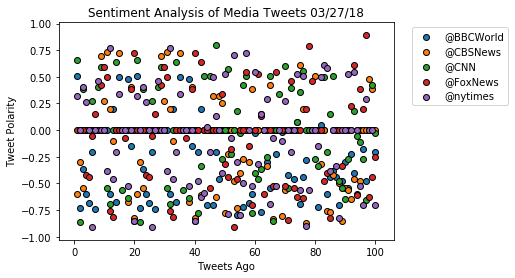

In [11]:
dfs = []
for item in sentiment_array:
    [int(x) for x in item["Tweets Ago"]]
    df = pd.DataFrame(item)
    dfs.append(df)
    plt.scatter(item["Tweets Ago"], item["Compound Score"], label = item["Outlet"], edgecolors = "black")
    
# export results
result = pd.concat(dfs)
result.to_csv("Sentiments.csv")

# create the titles, legends, and axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets %s" % time.strftime("%x"))


# save figure
plt.savefig("Sentiment Analysis.png")

plt.show()

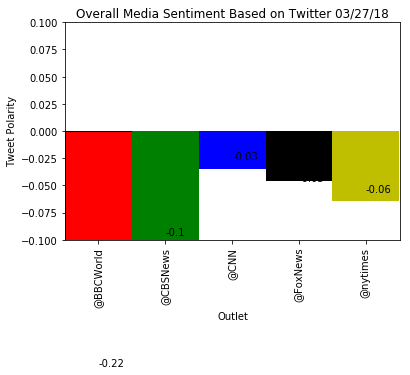

In [12]:
# create the dataframe
avg_df = pd.DataFrame.from_dict(sentiment_array_avg)

# create x_axis
x_axis = range(len(avg_df["Outlet"]))

# create color palette
my_colors = 'rgbkymc'

# create the bar plot for the graph
sent_ch = avg_df.plot(kind='bar', x = "Outlet", y = "Compound Score", stacked=True, edgecolor = "black",
                              linewidth = 1, width=1, color = my_colors, legend = None)

# add labels and set the xlim
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter %s" % time.strftime("%x"))
plt.xlim(-.5, len(x_axis)-.49)
plt.ylim(-.1, .1)

# add data labels
y = round(avg_df["Compound Score"], 2)
x = range(0,len(avg_df["Outlet"]))

for a,b in zip(x, y):
    plt.text(a, b + .004, str(b))

# save the figure and show the plot
plt.savefig("Overall Sentiment.png")
plt.show()